In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sp
from sympy import *

In [2]:
init_session()
s = symbols('s')
%matplotlib inline
plt.rcParams.update({'mathtext.default':  'regular' })

IPython console for SymPy 1.3 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [3]:
def plotter(fig_no,arg1,arg2,label_x,label_y,
            type=plt.plot,arg3='b-',title="",
            cmap = matplotlib.cm.jet):
    plt.figure(fig_no)
    plt.grid(True)
    if type==plt.contourf:
        type(arg1,arg2,arg3,cmap=cmap)
        plt.colorbar()
    else:
        type(arg1,arg2,arg3)
    plt.xlabel(label_x,size =19)
    plt.ylabel(label_y,size =19)
    plt.title(title)

In [4]:
def simplifytoH(A,b,V):
    Vo = V[3]
    w = np.logspace(0,8,801)
    ss = 1j*w
    hf = lambdify(s,Vo,'numpy')
    v = hf(ss)
    Vo = expand(simplify(Vo))
    H = sympytoscipytf(Vo)
    return H

In [5]:
def sympytoscipytf(Vo):
    v1 = fraction(Vo)
    n,d = Poly(v1[0],s),poly(v1[1],s)
    numer,denom = n.all_coeffs(), d.all_coeffs()
    numer,denom = [float(f) for f in numer], [float(f) for f in denom]
    H = sp.lti(numer,denom)
    return H

In [6]:
def bodeplot(H):
    w,s,phi = H.bode()
    plt.subplot(2,1,1)
    plt.semilogx(w,s)
    plt.grid(True)
    plt.xlabel(r'$\omega$',size=17)
    plt.ylabel(r'$|H(j\omega)|$',size =17)
    plt.subplot(2,1,2)
    plt.semilogx(w,phi)
    plt.grid(True)
    plt.xlabel(r'$\omega$',size=17)
    plt.ylabel(r'$\angle(H(j\omega))$',size =17)

In [7]:
def lowpass(R1,R2,C1,C2,G,Vi=1):
    A = Matrix([[0,0,1,-1/G],[-1/(1+s*R2*C2),1,0,0],
                   [0,-G,G,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b = Matrix([0,0,0,Vi/R1])
    V = A.inv()*b
    return(A,b,V)

In [8]:
def highpass(R1,R2,C1,C2,G,Vi = 1):
    A = Matrix([[0,0,1,-1/G],[-1/(1+1/(s*R2*C2)),1,0,0],
                [0,-G,G,1],[-s*C1-s*C2-1/R1,s*C2,0,1/R1]])
    b = Matrix([0,0,0,Vi*s*C1])
    V = A.inv()*b
    return(A,b,V)

In [9]:
A,b,V = lowpass(10000,10000,1e-8,1e-8,1.586,1)
Hl = simplifytoH(A,b,V)
print(Hl)

TransferFunctionContinuous(
array([-79300000.]),
array([1.000e+00, 2.207e+04, 1.000e+08]),
dt: None
)


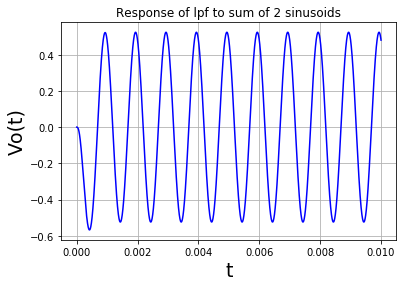

In [22]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hl,(np.sin(2000*np.pi*t)+np.cos(2*10**6*np.pi*t)),t)
plotter(0,t,vtd,r"t",r'Vo(t)',
       plt.plot,title ='Response of lpf to sum of 2 sinusoids')

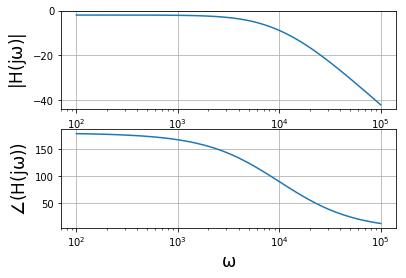

In [11]:
bodeplot(Hl)

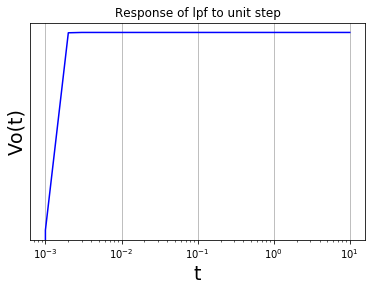

In [12]:
t,vtd,svec = sp.lsim(Hl,np.ones_like(t),t)
plotter(0,t,abs(vtd),r"t",r'Vo(t)',
       plt.loglog,title ='Response of lpf to unit step')

In [13]:
A,b,V = highpass(1e4,1e4,1e-9,1e-9,1.586)
Hh = simplifytoH(A,b,V)

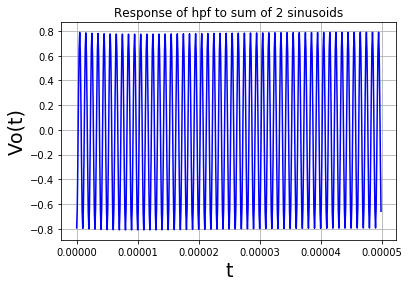

In [18]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hh,(np.sin(2000*np.pi*t)+np.cos(2*10**6*np.pi*t)),t)
plotter(0,t[0:500],vtd[0:500],r"t",r'Vo(t)',
       plt.plot,title ='Response of hpf to sum of 2 sinusoids')

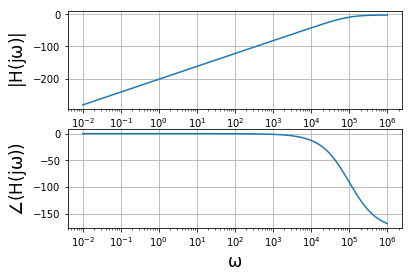

In [15]:
bodeplot(Hh)

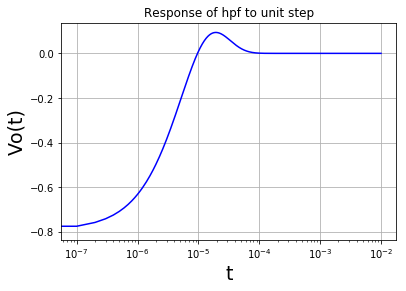

In [16]:
t,vtd,svec = sp.lsim(Hh,np.ones_like(t),t)
plotter(0,t,(vtd),r"t",r'Vo(t)',
       plt.semilogx,title ='Response of hpf to unit step')

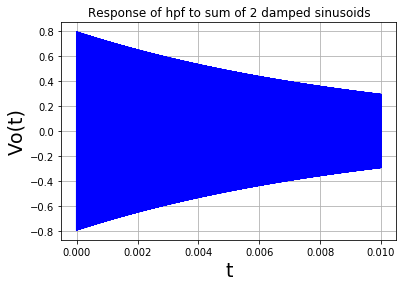

In [27]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hh,np.exp(-100*t)*(np.cos(2*10**6*np.pi*t)),t)
plotter(0,t,vtd,r"t",r'Vo(t)',
       plt.plot,title ='Response of hpf to high freq damped sinusoid')

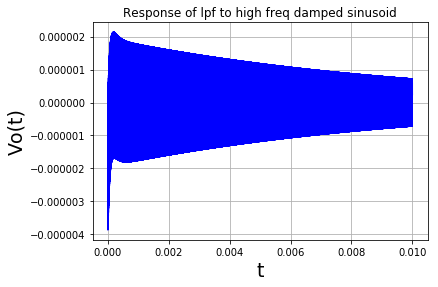

In [28]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hl,np.exp(-100*t)*(np.cos(2*10**6*np.pi*t)),t)
plotter(0,t,vtd,r"t",r'Vo(t)',
       plt.plot,title ='Response of lpf to high freq damped sinusoid')

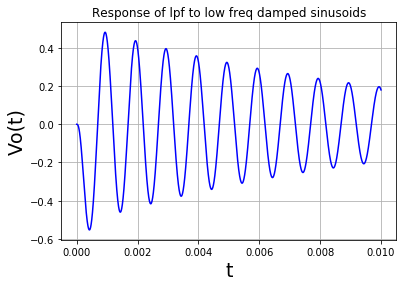

In [26]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hl,np.exp(-100*t)*(np.sin(2000*np.pi*t)),t)
plotter(0,t,vtd,r"t",r'Vo(t)',
       plt.plot,title ='Response of lpf to low freq damped sinusoid')

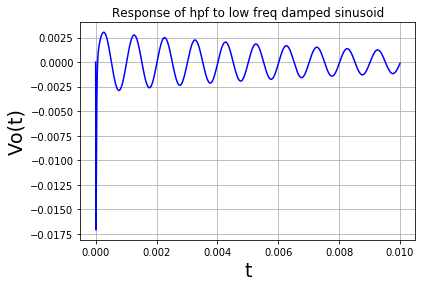

In [29]:
t = np.arange(0,1e-2,1e-7)
t,vtd,svec = sp.lsim(Hh,np.exp(-100*t)*(np.sin(2000*np.pi*t)),t)
plotter(0,t,vtd,r"t",r'Vo(t)',
       plt.plot,title ='Response of hpf to low freq damped sinusoid')